In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re


Loading the token counter saved in `data/global_counter.json`. The counter was prepared
in `count_tokens.py`. 

The counter is first read as dictionary, then converted into a `pandas` df for 
ease of use. 

In [7]:
global_counter = json.load(open("../data/global_counter.json", "r"))
count_df = pd.DataFrame().from_dict(global_counter, orient="index", columns=["count"]).reset_index()

Sorting `count_df` by values to have an easier time looking for frequent and rare values.  

In [55]:
count_df_sorted = count_df.sort_values(["count"], ascending=False)

Measuring mean and median of the values in the dataset. 

In [30]:
mean_count = count_df_sorted["count"].mean()
median_count = count_df_sorted["count"].median()
print(f'The mean frequency is: {mean_count:.2f}')
print(f'The median frequency is: {median_count:.0f}')

The mean frequency is: 174199.03
The median frequency is: 13674


In the next plot, I will present the most frequent tokens in the vocabulary. In the plot, the x-axis represents the rank
of each token, while the y-axis is the number of occurrences of that token in the full corpus. 

Note that the y-axis uses a log scale. 

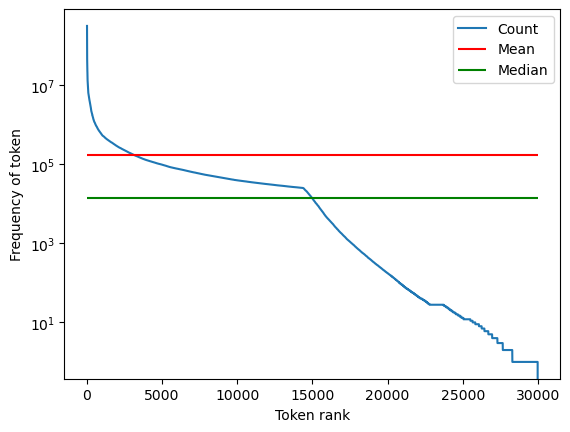

In [31]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(reset)), reset["count"], label="Count")
ax.set_yscale("log")
ax.hlines(mean_count, 10, 30000, color="red", label="Mean")
ax.hlines(median_count, 10, 30000, color="green", label="Median")
ax.set_ylabel("Frequency of token")
ax.set_xlabel("Token rank")
plt.legend()

What is interesting to notice here is that the graph is split roughly in two parts, with the first ~15k tokens behaving 
according to a typical power law (few, very frequent values, long tail of rare values), while as the ranks go down, the 
frequency of each token drops far more sharply. In fact, a very large number of tokens appears only once in the entire 
corpus. 

### Extracting the more frequent values, then plotting the result. 

In [32]:
more_frequent = count_df_sorted.loc[count_df_sorted["count"] > median_count]

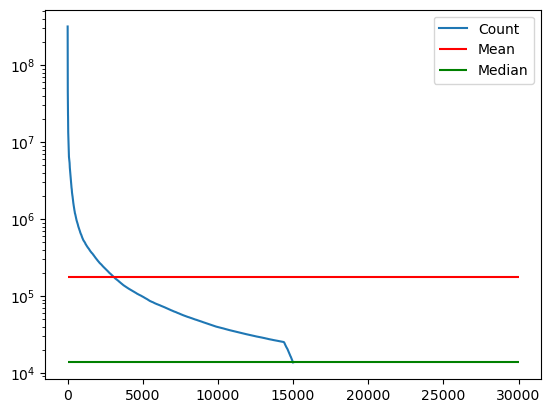

In [33]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(more_frequent)), more_frequent["count"], label="Count")
ax.set_yscale("log")
ax.hlines(mean_count, 10, 30000, color="red", label="Mean")
ax.hlines(median_count, 10, 30000, color="green", label="Median")
plt.legend()

I wanted to have a better representation of the type of tokens over the entire vocabulary, so I decided to group tokens 
in one of three classes: 
 1. "words", that is tokens that contain only letters.
 2. "numbers", i.e. tokens that contain only digits.
 3. "everything else", or those tokens that do not fall into either of the previous two classes. This includes punctuation and non-standard characters. 

In [34]:
def map_to_class(val):
    match_words = re.compile(r"[a-z]*")
    match_numbers = re.compile(r"[0-9]*")
    if match_words.match(val).group():
        return 0
    elif match_numbers.match(val).group():
        return 1
    else:
        return -1

### Counts as a heatmap
It is possible to plot the distribution as a heatmap with three colors, one for 
each class. 

Custom ticks according to [this example](https://matplotlib.org/stable/gallery/ticks/colorbar_tick_labelling_demo.html).

[Text(1, -1, 'punct'), Text(1, 0, 'word'), Text(1, 1, 'number')]

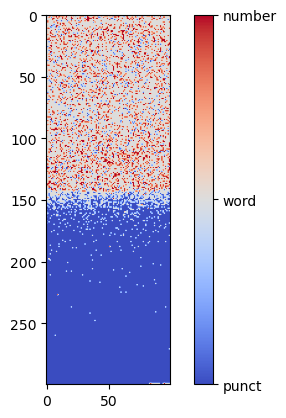

In [47]:
from matplotlib import cm
data = count_df_sorted["index"][:].apply(map_to_class).values.reshape(-1, 100)
fig, ax = plt.subplots()

cax = ax.imshow(data, cmap = cm.coolwarm)

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
cbar.ax.set_yticklabels(['punct', 'word', 'number'])  # vertically oriented colorbar

We can notice a few things from this plot: 
 1. In the first half of the vocabulary, words and numbers are roughly comparable in frequency, while punctuation and othe unusual characters appear very rarely. 
 2. The opposite is true in the second half of the plot: in the bottom ranks, almost all tokens are punctuation or unicode characters, with the exception of the very last few values. 

Note that the fact that punctuation does not appear frequently in the image does not mean that the punctuation tokens are rare: quite the opposite in fact. The reason why punctuation 
does not appear quite as frequently is most likely due to the fact that there is a limited (and quite a bit smaller) number of viable combinations of punctuation characters, compared 
to the potential combinations of letters or numbers. 

In fact, if we take a look at what the top and bottom values are, we can immediately notice that most of the "frequent" tokens are indeed punctuation. Interestingly, while many of the
"word" tokens are frequent words in common language ("the", "a", "of", "and"), "comment" also appears in the top30. Digits such as 0, 1, 2, 3 also appear in order in the ranking (this is even 
consistent with [Benford's Law](https://en.wikipedia.org/wiki/Benford's_law)).

In [54]:
# Top 30 values
display(count_df_sorted[:30])
# Bottom 30 values
display(count_df_sorted[-30:])

,index,count
161,.,318338739
19615,0,298380457
5842,-,105119334
6800,/,90800377
24846,",",84356154
15285,the,77381666
16150,a,63361275
5046,1,51736130
2048,to,50964890
9680,',46412545


,index,count
6248,⯙,1
11059,𝨹,1
21414,镼,1
28171,鰇,1
18618,𐅀,1
14634,𞄰,1
6212,𝤍,1
18608,𝧟,1
11049,宍,1
11056,麹,1
